In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_excel('regression.xlsx')
year_list = data['Year'].unique().tolist()
country_list = data['Country'].unique().tolist()
data.set_index(['Country','Year'],inplace=True)
# score = pd.read_csv('topsis_original.csv')
# score.set_index(['Country','Year'],inplace=True)
# score = pd.DataFrame(score['Score'])
# data = pd.concat([data,score],axis=1)
data

,,Total Energy,Fertilizer,Consumption in Agriculture,Government_Management,Law&Political Stability,Unemployment_rate,Yield,Gini_Index,CPI,Male/Female,Rural/Urban,Developed,Score
Country,Year,,,,,,,,,,,,,
Afghanistan,2000,74174.8829,0.64,432.0000,-1.350000,-2.630000,11.517000,57031.55319,29.000000,3.951382e+01,1.059369,3.529414,2,2.815037
Albania,2000,77392.1087,26.75,33540.0000,-0.560000,-1.030000,16.573000,93010.24194,31.740000,6.660077e+01,1.024432,1.395734,1,3.461113
Algeria,2000,74132.7500,11.27,0.0000,-1.060000,-0.920000,29.770000,55748.24286,27.620000,5.542482e+01,1.027428,0.668931,1,3.121974
Angola,2000,74182.8939,0.42,516.0000,-1.520000,-1.180000,3.837000,45371.66667,51.960000,1.812510e+00,0.989632,0.996512,2,1.896367
Antigua and Barbuda,2000,100294.5043,0.00,282880.2545,1.270000,-2.050000,8.394268,50049.87097,39.583658,7.349858e+01,0.886170,2.112650,1,3.307945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,81002.4751,139.67,70692.0000,-0.068282,0.245215,6.896713,127383.85510,37.791460,2.633984e+08,0.970604,0.133276,1,0.385091
Viet Nam,2019,89276.2317,251.76,155832.0000,-0.068282,0.245215,6.896713,101925.65380,37.791460,1.131217e+02,0.996700,1.730120,1,3.296598
Yemen,2019,76138.5091,3.03,20640.0000,-0.068282,0.245215,6.896713,63858.63077,36.710000,1.844438e+02,1.015387,1.682885,2,2.537962


In [18]:
# 归一化
X = data.drop(['Score','CPI','Consumption in Agriculture'],axis=1)
# X = data.drop(['Score'],axis=1)
Y = data['Score']
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 1))  
# scaled_data = scaler.fit_transform(X)
# X = pd.DataFrame(scaled_data,index=X.index,columns=X.columns)
# print('X_Sclaer.shape: ',X.shape)
# data = pd.concat([X,Y],axis=1)
# data

Country                             Year
Afghanistan                         2000    2.815037
Albania                             2000    3.461113
Algeria                             2000    3.121974
Angola                              2000    1.896367
Antigua and Barbuda                 2000    3.307945
                                              ...   
Venezuela (Bolivarian Republic of)  2019    0.385091
Viet Nam                            2019    3.296598
Yemen                               2019    2.537962
Zambia                              2019    2.604234
Zimbabwe                            2019    1.902345
Name: Score, Length: 3760, dtype: float64

,,Total Energy,Fertilizer,Government_Management,Law&Political Stability,Unemployment_rate,Yield,Gini_Index,Male/Female,Rural/Urban,Developed
Country,Year,,,,,,,,,,
Afghanistan,2000,74174.8829,0.64,-1.350000,-2.630000,11.517000,57031.55319,29.000000,1.059369,3.529414,2
Albania,2000,77392.1087,26.75,-0.560000,-1.030000,16.573000,93010.24194,31.740000,1.024432,1.395734,1
Algeria,2000,74132.7500,11.27,-1.060000,-0.920000,29.770000,55748.24286,27.620000,1.027428,0.668931,1
Angola,2000,74182.8939,0.42,-1.520000,-1.180000,3.837000,45371.66667,51.960000,0.989632,0.996512,2
Antigua and Barbuda,2000,100294.5043,0.00,1.270000,-2.050000,8.394268,50049.87097,39.583658,0.886170,2.112650,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2019,81002.4751,139.67,-0.068282,0.245215,6.896713,127383.85510,37.791460,0.970604,0.133276,1
Viet Nam,2019,89276.2317,251.76,-0.068282,0.245215,6.896713,101925.65380,37.791460,0.996700,1.730120,1
Yemen,2019,76138.5091,3.03,-0.068282,0.245215,6.896713,63858.63077,36.710000,1.015387,1.682885,2


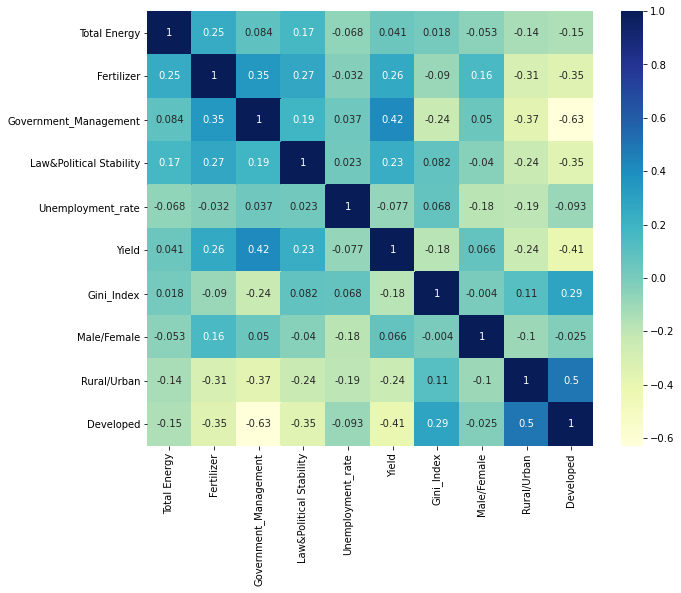

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True,cmap='YlGnBu')
display(Y)
display(X)

In [19]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time
import datetime

rfr = RFR(
#             n_estimators=400
#             ,n_jobs=2,max_depth=16
#             ,max_features=2
#             ,min_samples_split=7
#             ,min_samples_leaf = 1 
#             ,random_state=420
        ) 
reg = XGBR(n_estimators=10)

In [20]:
x = data.drop('Score',axis=1)
y = data['Score']
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,
                                                test_size=0.2,
                                                random_state=420)
Xtrain.shape

(3008, 10)

In [119]:
CVS(rfr,X,Y,cv=5).mean()#0.7975497480638329

0.47982052654550567

In [12]:
CVS(reg,X,Y,cv=5).mean()#0.7975497480638329

0.24423397030127356

In [21]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax
cv = KFold(n_splits=5, shuffle = True, random_state=42) #交叉验证模式

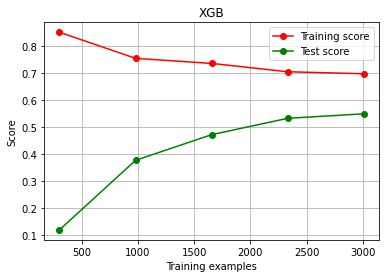

In [144]:
plot_learning_curve(reg
                    ,"XGB",X,Y,ax=None,cv=cv)
plt.show()

In [145]:
#=====【TIME WARNING：25 seconds】=====#

axisx = range(50,600,50)
rs = []
for i in axisx:
    reg = reg(n_estimators=i,
               max_depth = 8 ,
#                subsample=i ,
               random_state=420)
    score = CVS(reg,X,Y,cv=cv).mean()
    rs.append(score)
    print(score)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

TypeError: 'XGBRegressor' object is not callable

0     -14.989584862950284
0 -14.989584862950284 0.9462545287221689
0 -14.989584862950284 0.9462545287221689
0 -14.989584862950284 0.9462545287221689 256.61307861821103


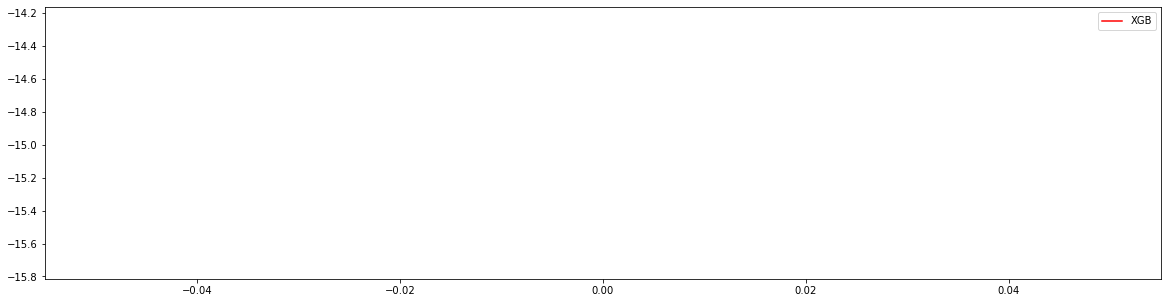

In [148]:
#======【TIME WARNING: 20s】=======#
axisx = range(0,1,20)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=460,subsample=i,random_state=420)
    cvresult = CVS(reg,X,Y,cv=cv)
    #记录1-偏差
    rs.append(cvresult.mean())
    #记录方差
    var.append(cvresult.var())
    #计算泛化误差的可控部分
    ge.append((1 - cvresult.mean())**2+cvresult.var())
    print(i ,'   ' , cvresult.mean())
#打印R2最高所对应的参数取值，并打印这个参数下的方差
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
#打印方差最低时对应的参数取值，并打印这个参数下的R2
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
#打印泛化误差可控部分的参数取值，并打印这个参数下的R2，方差以及泛化误差的可控部分
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

0.8421052631578947 0.736079158397305


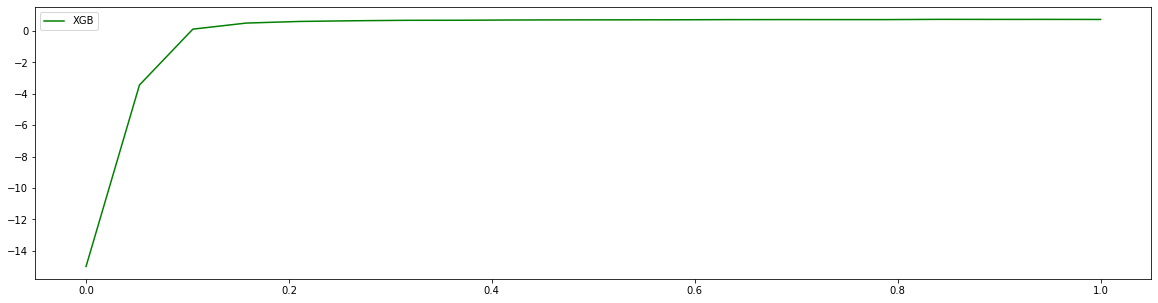

In [150]:
axisx = np.linspace(0,1,20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=460,subsample=i,random_state=420)
    rs.append(CVS(reg,X,Y,cv=cv).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="green",label="XGB")
plt.legend()
plt.show()

In [158]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,CVS(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [160]:
reg = XGBR(n_estimators=460,
               random_state=420,
               subsample= 0.2)
regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"])

[0.5200888205042101, -0.2011673257085648]

0.05 0.6905042054014378


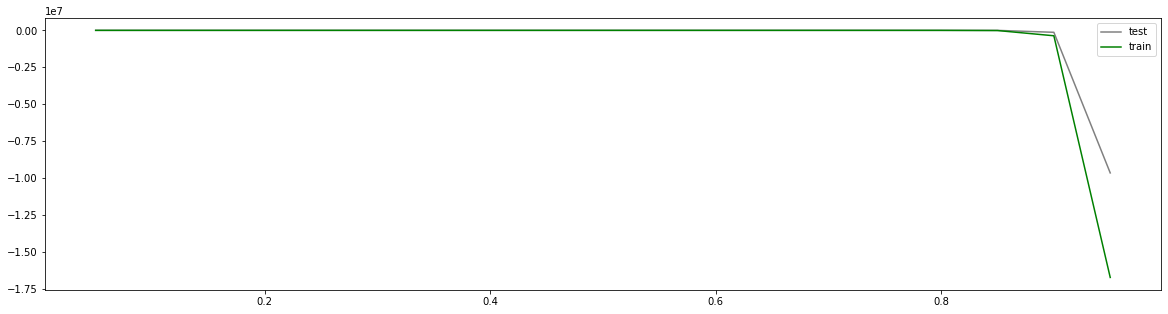

In [161]:
axisx = np.arange(0.05,1,0.05)
rs = []
te = []
for i in axisx:
    reg = XGBR(n_estimators=460,
               random_state=420,
               subsample= 0.2 , 
               learning_rate=i)
    score = regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2","neg_mean_squared_error"],show=False)
    test = reg.fit(Xtrain,Ytrain).score(Xtest,Ytest)
    rs.append(score[0])
    te.append(test)
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,te,c="gray",label="test")
plt.plot(axisx,rs,c="green",label="train")
plt.legend()
plt.show()

In [8]:
import time
for booster in ["gbtree","gblinear","dart"]:
    time_start=time.time()


    reg = XGBR(n_estimators=460
               ,learning_rate=0.1
#                ,subsample= 0.2
               ,random_state=420
               ,booster=booster).fit(Xtrain,Ytrain)
    time_end=time.time()
    print('booster: ',booster)
    print('accuracy: ',reg.score(Xtest,Ytest))
    print('time cost',time_end-time_start,'s')
    print(' ')
    print('-----------------')

booster:  gbtree
accuracy:  0.7684116488732748
time cost 1.3254525661468506 s
 
-----------------
booster:  gblinear
accuracy:  0.07178261862511659
time cost 0.11668705940246582 s
 
-----------------
booster:  dart
accuracy:  0.7684116321724792
time cost 9.683269739151001 s
 
-----------------


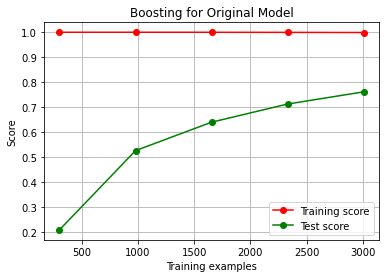

In [34]:
    reg = XGBR(n_estimators=460
               ,learning_rate=0.1
               , max_depth = 8
#                ,subsample= 0.2
               ,random_state=420
               ,booster="gbtree")
plot_learning_curve(reg
                    ,"Boosting for Original Model",X,Y,ax=None,cv=cv)
plt.show()

In [30]:
model = reg.fit(Xtrain,Ytrain)
print ('MSE:   ' , MSE(Ytest,model.predict(Xtest)))
model = reg.fit(X,Y)
print('Weight:   ' ,model.feature_importances_)
weight = pd.DataFrame(model.feature_importances_)
weight.index = X.columns
weight = weight.T
weight.to_csv('r_weight.csv')
weight

MSE:    0.18528058150317317
Weight:    [0.167391   0.05822866 0.13240379 0.13880913 0.05817331 0.10545111
 0.09053572 0.08599485 0.09880798 0.06420444]


,Total Energy,Fertilizer,Government_Management,Law&Political Stability,Unemployment_rate,Yield,Gini_Index,Male/Female,Rural/Urban,Developed
0,0.167391,0.058229,0.132404,0.138809,0.058173,0.105451,0.090536,0.085995,0.098808,0.064204


In [31]:
developed = data[data['Developed']==0]
developing = data[~(data['Developed']==0)]

developed_x = developed.drop(['Score','CPI','Developed','Consumption in Agriculture'],axis=1)
developed_y = developed['Score']

developing_x = developing.drop(['Score','CPI','Developed','Consumption in Agriculture'],axis=1)
developing_y = developing['Score']

developed_model = reg.fit(developed_x,developed_y)
print('Developed_Country_Weight:   ' ,developed_model.feature_importances_)
weight = pd.DataFrame(developed_model.feature_importances_,columns=['Developed'])
print('-------------------------------')
developing_model = reg.fit(developing_x,developing_y)
print('Developing_Country_Weight:   ' ,developing_model.feature_importances_)
weight['developing'] = pd.DataFrame(developing_model.feature_importances_)
weight.index = developed_x.columns
weight = weight.T
weight.to_csv('dev_weight.csv')
weight

Developed_Country_Weight:    [0.12750767 0.08900533 0.05844038 0.1675225  0.04105387 0.04708049
 0.1988821  0.19367398 0.07683366]
-------------------------------
Developing_Country_Weight:    [0.18960826 0.06217304 0.10330361 0.10968767 0.08239049 0.09399082
 0.08399505 0.09877268 0.17607836]


,Total Energy,Fertilizer,Government_Management,Law&Political Stability,Unemployment_rate,Yield,Gini_Index,Male/Female,Rural/Urban
Developed,0.127508,0.089005,0.058440,0.167523,0.041054,0.047080,0.198882,0.193674,0.076834
developing,0.189608,0.062173,0.103304,0.109688,0.082390,0.093991,0.083995,0.098773,0.176078


<!-- # import matplotlib.pyplot as plt -->
fi = model.feature_importances_
sorted_idx = np.argsort(fi)[-7:]
pos = np.arange(sorted_idx.shape[0]) + .5
fig, ax = plt.subplots()
ax.barh(pos, fi[sorted_idx], align='center')
plt.yticks(pos, np.array(X_test.columns)[sorted_idx])
for i, v in enumerate(fi[sorted_idx].tolist()):
    ax.text(v,i+.25,str(round(v*100,2))+'%',fontweight='bold')
plt.show()